In [2]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

## dataset description

## importing the dataset

In [3]:


# Standard method of loading Statsmodels datasets into a pandas DataFrame. Note the name fair stands for 'affair' dataset.
df = sm.datasets.fair.load_pandas().data



In [4]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


## exploratory analysis and feature engineering

In [10]:
def affair_check(x):
    if(x!=0):
        return 1
    else:
        return 0
    

In [11]:
df['had_affair'] = df['affairs'].apply(affair_check)

In [12]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174,1
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086,1
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999,1
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333,1


In [13]:
df.groupby('had_affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
had_affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


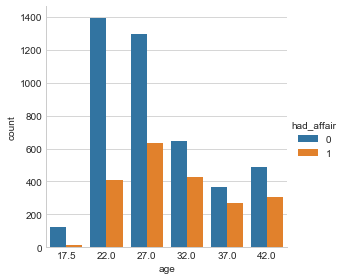

In [16]:
sns.factorplot('age',data=df,hue='had_affair',kind='count')

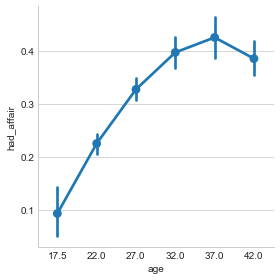

In [18]:
sns.factorplot('age','had_affair',data=df)

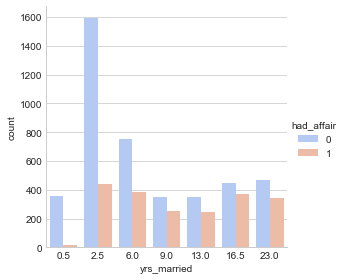

In [19]:
sns.factorplot('yrs_married',data=df,hue='had_affair',palette='coolwarm',kind='count')

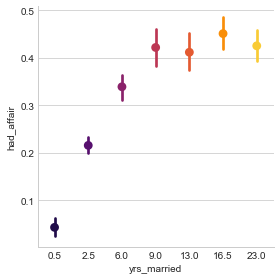

In [20]:
sns.factorplot('yrs_married','had_affair',data=df,palette='inferno')

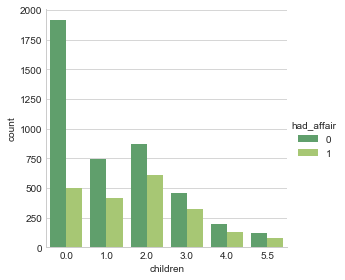

In [22]:
sns.factorplot('children',data=df,hue='had_affair',palette='summer',kind='count')

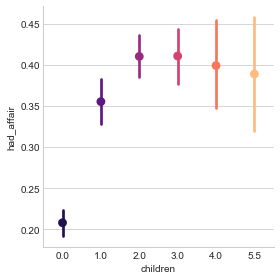

In [24]:
sns.factorplot('children','had_affair',data=df,palette='magma')

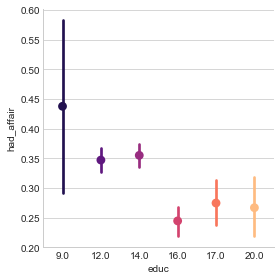

In [25]:
sns.factorplot('educ','had_affair',data=df,palette='magma')

## data preparation and feature engineering

In [26]:
occ_dummies = pd.get_dummies(df['occupation'])

hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

In [27]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [28]:
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']

In [29]:
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [30]:
df = pd.concat([df,hus_occ_dummies,occ_dummies],axis=1)

In [35]:
df = df.drop(['occupation','occupation_husb'],axis=1)

In [36]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,had_affair,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6,occ1,occ2,occ3,occ4,occ5,occ6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,1,0,0,0,0,1,0,0,1,0,0,0,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,1,0,0,0,1,0,0,0,0,1,0,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,1,0,0,0,0,1,0,0,0,1,0,0,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,1,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,1,0,0,0,1,0,0,0,0,1,0,0,0


In [43]:
X = df.drop(['had_affair','affairs'],axis=1)

In [42]:
 Y = df['had_affair']

In [45]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6,occ1,occ2,occ3,occ4,occ5,occ6
0,3.0,32.0,9.0,3.0,3.0,17.0,0,0,0,0,1,0,0,1,0,0,0,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,0,0,1,0,0,0,0,1,0,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,0,0,0,1,0,0,0,1,0,0,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,0,0,1,0,0,0,0,1,0,0,0


In [46]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: had_affair, dtype: int64

to avoid multicollinearity:

In [47]:
X=X.drop(['occ1','hocc1'],axis=1)

In [48]:
Y  = np.ravel(Y)

In [49]:
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

## Logistic regression using scikit learn

In [50]:
log_model = LogisticRegression()


In [51]:
log_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
log_model.score(X,Y)

0.7260446120012567

In [55]:
1-Y.mean()

0.67750549795790138

In [72]:
np.array(X.columns)

array(['rate_marriage', 'age', 'yrs_married', 'children', 'religious',
       'educ', 'hocc2', 'hocc3', 'hocc4', 'hocc5', 'hocc6', 'occ2', 'occ3',
       'occ4', 'occ5', 'occ6'], dtype=object)

In [71]:
log_model.coef_

array([[-0.69766251, -0.05630646,  0.10383626,  0.0181172 , -0.36794716,
         0.00907406,  0.23298427,  0.33691469,  0.20218726,  0.22510101,
         0.22791614,  0.29370943,  0.6044346 ,  0.34157231,  0.93880748,
         0.89541728]])

In [93]:
coeff_df = DataFrame()

In [94]:
coeff_df['features'] = Series(np.array(X.columns))
coeff_df['coefficients'] = Series(log_model.coef_[0])

In [95]:
coeff_df

,features,coefficients
0,rate_marriage,-0.697663
1,age,-0.056306
2,yrs_married,0.103836
3,children,0.018117
4,religious,-0.367947
5,educ,0.009074
6,hocc2,0.232984
7,hocc3,0.336915
8,hocc4,0.202187
9,hocc5,0.225101


## testing and training dataset

In [108]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [109]:
log_model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [110]:
pred_train = log_model.predict(X_train)

In [111]:
pred_test = log_model.predict(X_test)

In [112]:
log_model.score(X_train,Y_train)

0.72517804775869288

In [113]:
print(metrics.accuracy_score(Y_test,pred_test))

0.724246231156


In [117]:
Y_test

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [118]:
pred_test

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [119]:
diff=Y_test-pred_test

In [122]:
diff = DataFrame(diff)

In [124]:
diff.columns=['diff']

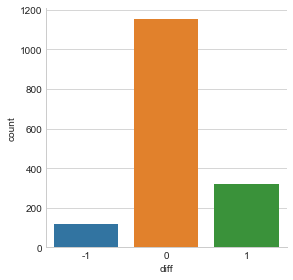

In [125]:
sns.factorplot('diff',data=diff,kind='count')